# KNeighboursClassifier

В этом задании вам нужно подобрать оптимальное значение k для алгоритма kNN. Будем использовать набор данных Wine, где требуется предсказать сорт винограда, из которого изготовлено вино, используя результаты химических анализов.

Загрузите выборку Wine по адресу https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data (файл также приложен к этому заданию)

In [15]:
import pandas as pd
data = pd.read_csv('wine.data', header=None)
print(data.shape)
data.head(2)

(178, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


Извлеките из данных признаки и классы. Класс записан в первом столбце (три варианта), признаки — в столбцах со второго по последний. Более подробно о сути признаков можно прочитать по адресу https://archive.ics.uci.edu/ml/datasets/Wine (см. также файл wine.names, приложенный к заданию)

In [16]:
X = data.ix[:, 1:]
y = data.ix[:, 0]
print(X.shape, y.shape)
X.head(2)

(178, 13) (178,)


,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


Технически кросс-валидация проводится в два этапа:

    Создается генератор разбиений sklearn.model_selection.KFold, который задает набор разбиений на обучение и валидацию. Число блоков в кросс-валидации определяется параметром n_folds. Обратите внимание, что порядок следования объектов в выборке может быть неслучайным, это может привести к смещенности кросс-валидационной оценки. Чтобы устранить такой эффект, объекты выборки случайно перемешивают перед разбиением на блоки. Для перемешивания достаточно передать генератору KFold параметр shuffle=True.
    Вычислить качество на всех разбиениях можно при помощи функции sklearn.model_selection.cross_val_score. В качестве параметра estimator передается классификатор, в качестве параметра cv — генератор разбиений с предыдущего шага. С помощью параметра scoring можно задавать меру качества, по умолчанию в задачах классификации используется доля верных ответов (accuracy). Результатом является массив, значения которого нужно усреднить.

Оценку качества необходимо провести методом кросс-валидации по 5 блокам (5-fold). Создайте генератор разбиений, который перемешивает выборку перед формированием блоков (shuffle=True). Для воспроизводимости результата, создавайте генератор KFold с фиксированным параметром random_state=42. В качестве меры качества используйте долю верных ответов (accuracy).

Найдите точность классификации на кросс-валидации для метода k ближайших соседей (sklearn.neighbors.KNeighborsClassifier), при k от 1 до 50. При каком k получилось оптимальное качество? Чему оно равно (число в интервале от 0 до 1)? Данные результаты и будут ответами на вопросы 1 и 2.

In [35]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import numpy as np
def get_best_KNN(X, y, k1, k2, count):
    gen_split = KFold(n_splits=5, shuffle=True, random_state=42)
    score = {}
    for k in range(k1, k2 + 1):
        clf = KNeighborsClassifier(n_neighbors=k)
        res = cross_val_score(clf, X, y, cv=gen_split)
        score[k] = np.mean(res)
    plt.plot(list(score.keys()), list(score.values()))
    plt.show()
    result = list(score.items())
    result = sorted(result, key=lambda x: x[1], reverse=True)
    print(result[:count])
    return result[0]

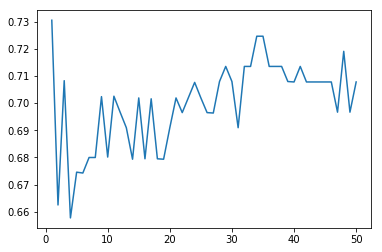

[(1, 0.7304761904761905), (34, 0.72460317460317469), (35, 0.72460317460317469), (48, 0.71904761904761916), (36, 0.71349206349206362)]


In [36]:
ans1 = get_best_KNN(X, y, 1, 50, 5)

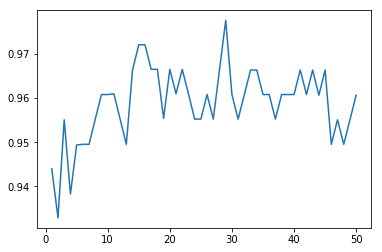

[(29, 0.9776190476190475), (15, 0.97206349206349218), (16, 0.97206349206349218), (17, 0.96650793650793643), (18, 0.96650793650793643)]


In [37]:
from sklearn.preprocessing import scale
ans2 = get_best_KNN(scale(X), y, 1, 50, 5)

In [40]:
def printAns(string, file_name):
    with open(file_name, 'w') as f:
        f.write(str(string))

In [41]:
printAns(ans1[0], '1.txt')
!cat 1.txt

In [43]:
printAns(round(ans1[1], 2), '2.txt')
!cat 2.txt

0.73

In [44]:
printAns(ans2[0], '3.txt')
!cat 3.txt

29

In [45]:
printAns(round(ans2[1], 2), '4.txt')
!cat 4.txt

0.98